# EDA

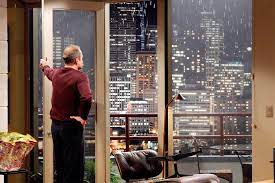

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:

# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1)

#### Checking the data

In [ ]:
# Create DataFrame 
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.isnull()

In [ ]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()
# no duplicates

##### My Hypothoses:

1. 
* The more sqft_living a house has, the more expensive it is. Check price and price per sqft.
* The more rooms a house has the more expensive it is.
* The more bathrooms a house has, the more expensive it is.
<br>
2.
* The sale price increases with the proximity to the city center.
    * How far or near can we find cheap houses for families? Can't be rural because of work and school -> has to be minimum in suburbs.
<br>
3.
* Homes in a neighbourhood of people with a migration background are cheaper. (e.g Chinatown in Seattle)
<br>

##### Cleaning Data

Because column price is the most important regarding the stakeholders interest in buying cheap, first create a variable price/sqft_living to determine if a house is sold below, at or above average. Save in DataFrame. (Show before and after filtering.)
<br>
* Make a plot for column price_per_sqft. (Detect witch average to use for further filtering: Mean, Mode or Median?)
<br>
* Filter the DataFrame: Save in DataFrame that only houses with price_per_sqft below or equal to average are in. 
<br>


Price per sqft is missing in dataset. Make new column: price_per_sqft

In [ ]:
# Calculate price per sqft_living per house:
price_per_sqft_series= df['price']/df['sqft_living']
price_per_sqft_series.name = 'price_per_sqft'
df = pd.concat([df, price_per_sqft_series], axis=1)
df.head()

In [ ]:
df['price_per_sqft'].describe()

Make a boxplot and histogram to show distribution of price:

In [ ]:
# Boxplot and Histogram for 'price' with mean, median, mode and percentile displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['price'].mean()
median=df['price'].median()
mode=df['price'].mode().values[0]
cutoff1=df['price'].quantile(0.25)
cutoff2=df['price'].quantile(0.75)

sns.boxplot(data=df, x="price", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff1, color='black', linestyle='-.')
ax_box.axvline(cutoff2, color='black', linestyle='-.')

sns.histplot(data=df, x="price", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff1, color='black', linestyle='-.', label="25 %")
ax_hist.axvline(cutoff2, color='black', linestyle='-.', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()


# Positively skewed graph: use median instead of mean for average.

Make a boxplot and histogram to show distribution of price_per_sqft:

In [ ]:
# Boxplot and Histogram for 'price_per_sqft' with mean, median, mode and percentile displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['price_per_sqft'].mean()
median=df['price_per_sqft'].median()
mode=df['price_per_sqft'].mode().values[0]
cutoff1=df['price_per_sqft'].quantile(0.25)
cutoff2=df['price_per_sqft'].quantile(0.75)

sns.boxplot(data=df, x="price_per_sqft", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff1, color='black', linestyle='-.')
ax_box.axvline(cutoff2, color='black', linestyle='-.')

sns.histplot(data=df, x="price_per_sqft", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff1, color='black', linestyle='-.', label="25 %")
ax_hist.axvline(cutoff2, color='black', linestyle='-.', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()


# Positively skewed graph: use median instead of mean for average.

##### Let's check the first hypothesis: The more the sqft_living is, the more expensive the house is: 

* What is the correlation between price and sqft_living?            -> Correlation is strong.  
* What is the correlation between price_per_sqft and sqft_living?   -> Correlation is negativ weak.
* What is the correlation between price and bedrooms?               -> Correlation is moderate.  
* What is the correlation between price_per_sqft and bedrooms?      -> Correlation is negativ weak. 
<br>



detect and remove outliers with python 
upper = Q3 +1.5*IQR
lower = Q1 – 1.5*IQR


df_kc_housing.drop([15856], inplace=True)

In [ ]:
# correlation between price_per_sqft and bedrooms:
correlation = df['price'].corr(df['sqft_living'])
print(correlation.round(1))

In [ ]:
fig = px.scatter(df, x='price', y='sqft_living', color='price', opacity= 0.5, title='Correlation between Price and sqft living (correlation: 0.7)')
fig.show()

In [ ]:
correlation = df['price_per_sqft'].corr(df['sqft_living'])
print(correlation.round(1))

In [ ]:
fig = px.scatter(df, x='price_per_sqft', y='sqft_living', color='price_per_sqft', opacity= 0.5, title='Correlation between Price per sqft and sqft living (correlation: -0.1)')
fig.show()

In [ ]:
correlation = df['price'].corr(df['bedrooms'])
print(correlation.round(1))

In [ ]:
fig = px.scatter(df, x='price', y='bedrooms', color='price', opacity= 0.5, title='Correlation between Price and bedrooms (correlation: 0.3)')
fig.show()

In [ ]:
correlation = df['price_per_sqft'].corr(df['bedrooms'])
print(correlation.round(1))

In [ ]:
fig = px.scatter(df, x='price_per_sqft', y='sqft_living', color='price_per_sqft', opacity= 0.5, title='Correlation between Price per sqft and sqft living (correlation: -0.2)')
fig.show()

In [ ]:
correlation = df['price'].corr(df['bathrooms'])
print(correlation.round(1))

In [ ]:
fig = px.scatter(df, x='price', y='bathrooms', color='price', opacity= 0.5, title='Correlation between Price and Number of Bathrooms  (correlation: 0.5)')
fig.show()

##### Conclusion to first hypothesis:

a) The more sqft_living a house has the more expensive it gets. (The correlation between price per sqft and the sqft_living is weak.) -> Yes!
<br>
b) The more rooms a house has the more expensive it is. -> No, sqft_living is responsible for rising in price. 
<br>
Additional question:
<br>
c) The better the bathroom the more expensive the house? --> Yes. Strong correlation between price of house and number of bathrooms.

In [ ]:
# inspect bedrooms data
df['bedrooms'].describe()

In [ ]:
# make boxplot to show outliers for bedrooms:
df['bedrooms'].plot(kind='box');

In [ ]:
# make scatterplot with cutoff at 5 bedrooms and show correlation:
fig = px.scatter(df.query('bedrooms < 6'), x='price', y='sqft_living', color='bedrooms', opacity= 0.5, title= 'Houses with 1 to 5 bedrooms', hover_data=['bedrooms'])
fig.show()

In [ ]:
# show correlation:
correlation = df['price'].corr(df['sqft_living'])
print(correlation.round(1))

In [ ]:
# scatterplot for price and price_per_sqft and bedrooms:
fig = px.scatter(df.query('bedrooms < 6'), x='price_per_sqft', y='sqft_living', color='bedrooms', hover_data=['bedrooms'])
fig.show()

In [ ]:
# show correlation:
correlation = df['price_per_sqft'].corr(df['sqft_living'])
print(correlation.round(1))


There is a strong correlation between the price and the number of rooms. But the correlation between price per sqft and room is not as strong -> weak correlation.

What happens if I filter the dataframe that only houses below median will be shown?

In [ ]:
# return median of price
price_median = df['price'].median()
print(price_median)

In [ ]:
# series for df of price lower than median price:
price_below_median = df['price'] < price_median
#print(price_below_median)

# change name of series for column name:
price_below_median.name = 'price_below_median'

# merge for new column:
df = df.join(price_below_median, how='inner')
df

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
# scatterplot for price (filter: only show house when price below median), sqft_living and bedrooms:
fig = px.scatter(df.query('bedrooms < 6 and price_below_median == True '), x='price', y='sqft_living', color='bedrooms', hover_data=['bedrooms'])
fig.show()

In this scatterplot one can also see that the price is also strongly correlated to the number of rooms and the sqft living like in the scatterplot above.

In [ ]:
df['zipcode'].unique()

In [ ]:
# make scatterplot with cutoff at 5 and show correlation:
fig = px.scatter(df, x='zipcode', y='price_per_sqft', color='zipcode', hover_data=['bedrooms'])
fig.show()

In [ ]:
#gropby('zipcode').price.mean() in column speichern und dann df danach filtern und in obigen scatterplot einbauen: neuen machen
zipcode_price_median = df.groupby('zipcode').median()['price_per_sqft']
zipcode_price_median.name = 'zip_price_median'
df = df.merge(zipcode_price_median, on='zipcode')

In [ ]:
# make scatterplot with cutoff at 5 and show correlation:
fig = px.scatter(df.query('bedrooms < 6 and zip_price_median'), x='price', y='sqft_living', color='bedrooms', hover_data=['bedrooms'])
fig.show()

##### Start dropping columns

Start dropping columns if correlation between columns and column 'price_per_sqft' is weak (0.2) or moderate (0.3).
<br>
Drop it like it's hot...
<br>

In [ ]:
# Drop the ID column: won't need it for merging
df = df.drop('id', axis=1)
df.head()

In [ ]:
# correlation between column waterfront and column price_per_sqft
correlation = df['waterfront'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak -> drop column waterfront
df = df.drop('waterfront', axis=1)
df.head()

In [ ]:
# correlation between column floors and column price_per_sqft
correlation = df['floors'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak -> drop column floors
df = df.drop('floors', axis=1)
df.head()

In [ ]:
# correlation between column view and column price_per_sqft
correlation = df['view'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak -> drop column view
df = df.drop('view', axis=1)
df.head()

In [ ]:
# correlation between column condition and column price_per_sqft
correlation = df['condition'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak --> drop column condition
df = df.drop('condition', axis=1)
df.head()

In [ ]:
# correlation between column grade and column price_per_sqft
correlation = df['grade'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak -> drop column grade
df = df.drop('grade', axis=1)
df.head()

In [ ]:
# Focus on column price_per_sqft --> drop columns: sqft_basement and sqft_above
df = df.drop(['sqft_basement', 'sqft_above'], axis=1)
df.head()

In [ ]:
# correlation between column bedrooms and column price_per_sqft
correlation = df['bedrooms'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak! -> don't drop column bedrooms!! Needed to filter. Idea: Renovate big/ger houses with few rooms for families. 

In [ ]:
# correlation between column bathrooms and column price_per_sqft
correlation = df['bathrooms'].corr(df['price_per_sqft'])
print(correlation.round(1))

# no correlation, but! -> don't drop column bathrooms, bathrooms are essential for families

In [ ]:
# Drop column sqft_lot, because renovations regarding annexes are not in the stakeholders interest.
df = df.drop('sqft_lot', axis=1)
df.head()

In [ ]:
df.info()
# yr_renovated is missing values: 16.198 entries but only 13.337 entries in yr_renovated 

In [ ]:
# Make correlation matrix for columns yr_built, yr_renovated and price_per_sft, because of missing values in yr_renovated.

# make a variable to hold columns for correlation matrix:
features = ['yr_built', 'yr_renovated', 'price_per_sqft']
corr_matrix = df[features].corr()
print(corr_matrix.round(1))

# correlation is weak for yr_built and yr_renovated -> drop these columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

In [ ]:
df.describe()

In [ ]:
# Show and save only the rows where the price is lower than the price.median()
#df = df[df['price_per_sqft'] <= df['price_per_sqft'].quantile(0.25)] 
#df.info()

# From 21.597 entries to 16198 entries.

##### Checking second Hypothesis: Homes that are further away of a city center or are in a rural area are cheaper. 
##### Distance from a house to the city center (by my definition a city center is where the town/city hall is). 
##### I need:
* Top ten cities in King County by Total Population by Place
* Latitude and longitude of the cities town halls
* Function to calculate the distance between each house and my top ten city centers
* Function that returns the smallest distance to a city center.
* Make two new columns: column city (shows with city is nearest to the house) and column distance_to_center (shows distance in km from house to the city center).

In [ ]:
# Top ten cities in King County by Total Population by Place: 
# Source: https://statisticalatlas.com/county/Washington/King-County/Population
# Definition city center: lat and long of city town/city hall

# Dict of Top ten cities in King County by Total Population by Place
cities = {
    'Seattle':  (47.5994862,-122.3386744),
    'Bellvue': (47.614463,-122.2310811),
    'Kent': (47.3806225,-122.2561947,),
    'Renton': (47.4747632,-122.2142851),
    'Federal Way': (47.3012382,-122.322559),
    'Kirkland': (47.678471,-122.2452861),
    'Auburn': (47.3078503,-122.2484648),
    'Sammamish': (47.601572,-122.0390594),
    'Redmond': (47.6789194,-122.1358138),
    'Shoreline': (47.7562273,-122.3463749)

}


# Calculate distance from house to city center: ((house.lat - center.lat) + (house.long - center.long)**2)**0.5
# 1 degree = 111km
def distance(lat: float, long: float, center: tuple[float, float]) -> float:
    return round((((lat - center[0])**2 + (long - center[1])**2)**0.5)*111, 3)


# Returns smallest distance to center of nearest city in km:
def distance_to_center(lat: float, long: float) -> tuple:
    distances = {cityname: distance(lat, long, center) for cityname, center in cities.items()}
    smallest_distance = min(distances.items(), key=lambda x: x[1])
    return smallest_distance

In [ ]:
# Create new column: 'city'
df['city'] = df.apply(lambda x: distance_to_center(x['lat'], x['long'])[0], axis=1)
df.head()


In [ ]:
# Create new column: 'distance_to_center'
df['distance_to_center'] = df.apply(lambda x: distance_to_center(x['lat'], x['long'])[1], axis=1)
df.head()

In [ ]:
# Create new column: distance_rating for future plotting

# [0, 10, 20, 30, 40] --> ['center', 'near center', 'suburbs', 'rural']

distance_rating_bins = pd.cut(df['distance_to_center'], [0, 10, 20, 30, 40], labels=['center', 'near center', 'suburbs', 'rural']) #, labels=['center', 'near center', 'suburbs', 'outer area', 'rural'])
distance_rating_bins.name = 'distance_rating'

df = df.join(distance_rating_bins, how='inner')
df.head(10)
# print(distance_rating_bins)

##### Time to plot...

In [ ]:
# To create custom color palette: Create an array with the colors: 
colors = ['#238443','#78c679','#c2e699','#ffffcc']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

my_plot = sns.catplot(
    # you can use query on the data frame
    data=df,
    # set x and y axes, and a third categorical variable to display in color
    x='city', y='price_per_sqft', hue='distance_rating', 
    # the catplot has the option to add jitter to data points to keep them from overlapping as they would in the scatterplot,
    # default is True
    jitter=True, 
    # chose a color palette
    palette=customPalette,
    # by default, the legend is True, but was not to my taste :)
    legend=False,
    alpha=0.3
    )

# set figure size:
my_plot.fig.set_size_inches(15,5)

# set title 
my_plot.fig.suptitle('Price per Sqft in each City with Distance Rating', y=(1.05), size=20, color='grey')

# add a nicer legend with more options:
my_plot.add_legend(title='Distance Rating')

# show the graph
plt.show(my_plot)

    


In [ ]:
# calculate correlation for each city for distance_to_center and price_per_sqft
correlations = {}
for city in cities:
    city_series = df['city'] == city
    city_df = df[city_series]
    correlations[city] = city_df[['distance_to_center', 'price_per_sqft']].corr()
print(correlations)

##### Findings so far:

In Shoreline, Kirkland, Seattle, Redmond and Bellvue the price per sqft will rise the nearer to the center the houses are. 
In this data visualisation all houses are included (small or big, few or many bedrooms).
It would be interesting to look, how and if the scatterplot will change when we filter for big houses with few bedrooms. These are our targeted houses. 

In [ ]:
# Boxplot and Histogram for 'sqft_living' with mean, median and mode displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['sqft_living'].mean()
median=df['sqft_living'].median()
mode=df['sqft_living'].mode().values[0]
cutoff=df['sqft_living'].quantile(0.75)

sns.boxplot(data=df, x="sqft_living", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="sqft_living", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [ ]:
# Boxplot and Histogram for 'sqft_living' with mean, median and mode displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['bedrooms'].mean()
median=df['bedrooms'].median()
mode=df['bedrooms'].mode().values[0]
cutoff=df['bedrooms'].quantile(0.75)

sns.boxplot(data=df, x="bedrooms", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="bedrooms", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
# Make series with rows with 3 and less bedrooms:
bedrooms_series = df['bedrooms'] <= df['bedrooms'].mode()
bedrooms_series.name = 'few_bedrooms'

# Make series with rows where sqft_living is above the mode:
sqft_living_series = df['sqft_living'] >= df['sqft_living'].mode()
sqft_living_series.name = 'sqft_living_big'

# = pd.concat([df, price_per_sqft_series], axis=1)
#df.head()

In [ ]:
#plt.scatter(df['distance_to_center'], df['price_per_sqft'], alpha=0.2)

#plt.xlabel('Distance to City Center (km)')
#plt.ylabel('Price per Sqft (US $)')
#plt.title('Distance to City Center vs. Price per Sqft')

#plt.show();

In [ ]:
#df.query('city == "Shoreline"').plot(kind='scatter', x='distance_to_center', y='price_per_sqft', alpha=0.2);
